<a href="https://colab.research.google.com/github/sweksha21/ML-Powered-Anomaly-Detection/blob/main/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train = pd.read_csv('/content/Labeled_Dummy_Test_data.csv')
test = pd.read_csv('/content/Labeled_Dummy_Train_data.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  float64
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  float64
 5   dst_bytes                    22544 non-null  float64
 6   land                         22544 non-null  float64
 7   wrong_fragment               22544 non-null  float64
 8   urgent                       22544 non-null  float64
 9   hot                          22544 non-null  float64
 10  num_failed_logins            22544 non-null  float64
 11  logged_in                    22544 non-null  float64
 12  num_compromised              22544 non-null  float64
 13  root_shell      

In [ ]:
train.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,dataset_type
0,231.798039,tcp,ssh,REJ,-33228.455426,5522.306670,-0.007936,0.098628,0.008210,-1.132613,...,-0.234483,0.072779,0.136304,-0.029332,0.068508,0.102485,1.10863,0.751530,anomaly,test
1,0.000000,tcp,http,SF,303.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.00000,0.000000,normal,test
2,0.000000,tcp,private,REJ,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.060000,0.050000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,normal,test
3,-1481.394313,tcp,private,REJ,-66166.304630,2461.990552,-0.003786,-0.049134,-0.032344,0.036302,...,0.104515,0.033048,0.184246,0.115888,0.191587,0.057943,0.70937,1.152130,anomaly,test
4,-54.483317,tcp,ftp,SF,53902.795844,-7542.705298,0.000159,0.140961,-0.002872,2.203782,...,0.468794,-0.065284,-0.058671,-0.099437,0.063972,0.022689,-0.08107,-0.490316,anomaly,test


In [ ]:
train.describe()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,209.500515,6.714832e+03,2.075142e+03,0.000191,0.008605,0.001145,0.109070,0.022483,0.436494,0.105369,...,194.691282,139.055147,0.600063,0.092311,0.131922,0.019674,0.099729,0.101542,0.235440,0.229229
std,1381.335066,8.648764e+04,2.251547e+04,0.015274,0.145180,0.041315,1.411071,0.165485,0.519278,6.989840,...,98.332241,117.095263,0.459164,0.234153,0.322905,0.090910,0.289298,0.299077,0.407849,0.422057
min,-2680.054230,-1.745497e+05,-4.344843e+04,-0.020930,-0.308207,-0.075737,-2.799493,-0.298948,-0.785831,-3.501585,...,-143.312590,-184.009364,-0.843829,-0.436102,-0.551133,-0.154596,-0.516037,-0.509788,-0.854967,-0.727383
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,125.000000,16.000000,0.079977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.050000e+02,6.850000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.142993,0.000000,...,255.000000,152.000000,0.790000,0.020000,0.000888,0.000000,0.000000,0.000000,0.008134,0.000000
75%,35.000000,1.830803e+03,2.752843e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.080000,0.110000,0.022069,0.065226,0.050568,0.419065,0.357035
max,58669.516437,6.291668e+06,1.370732e+06,1.005654,3.107103,2.000000,101.456261,4.027126,1.867834,796.000000,...,420.450606,469.097688,1.767723,1.345413,1.486729,1.096916,1.423163,1.437537,1.522896,1.812430


In [ ]:
train.describe(include='object')


,protocol_type,service,flag,class,dataset_type
count,22544,22544,22544,22544,22544
unique,3,64,11,2,1
top,tcp,http,SF,normal,test
freq,18814,7670,14795,13527,22544


<ipython-input-6-69f6da9fad8c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


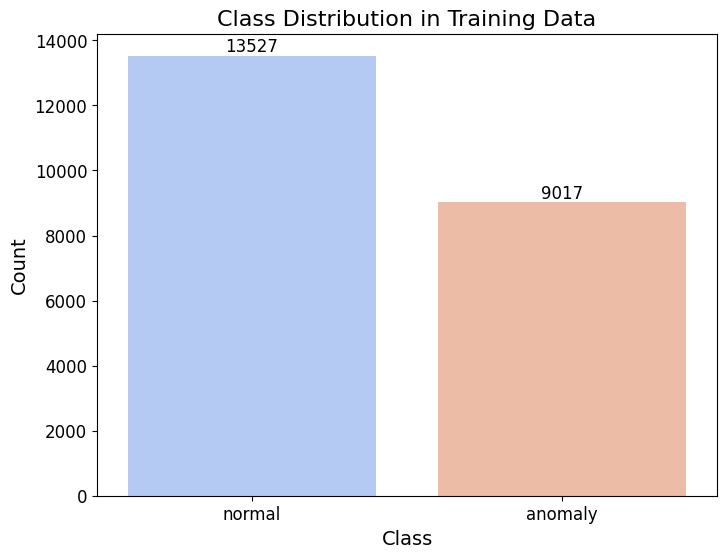

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    x=train["class"],
    order=["normal", "anomaly"],  # Ensure proper order
    palette="coolwarm"
)

# Add absolute values as labels
abs_values = train["class"].value_counts().reindex(["normal", "anomaly"]).values
for i, bar in enumerate(ax.patches):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{abs_values[i]}",  # Format as integer
        ha="center",
        va="bottom",
        fontsize=12
    )

# Set x-tick labels and add title
ax.set_title("Class Distribution in Training Data", fontsize=16)
ax.set_ylabel("Count", fontsize=14)
ax.set_xlabel("Class", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


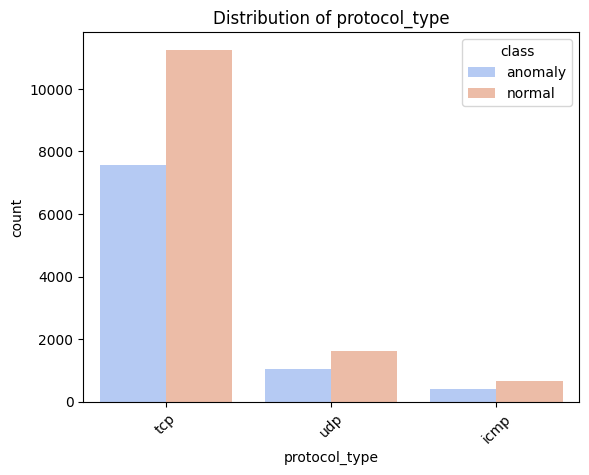

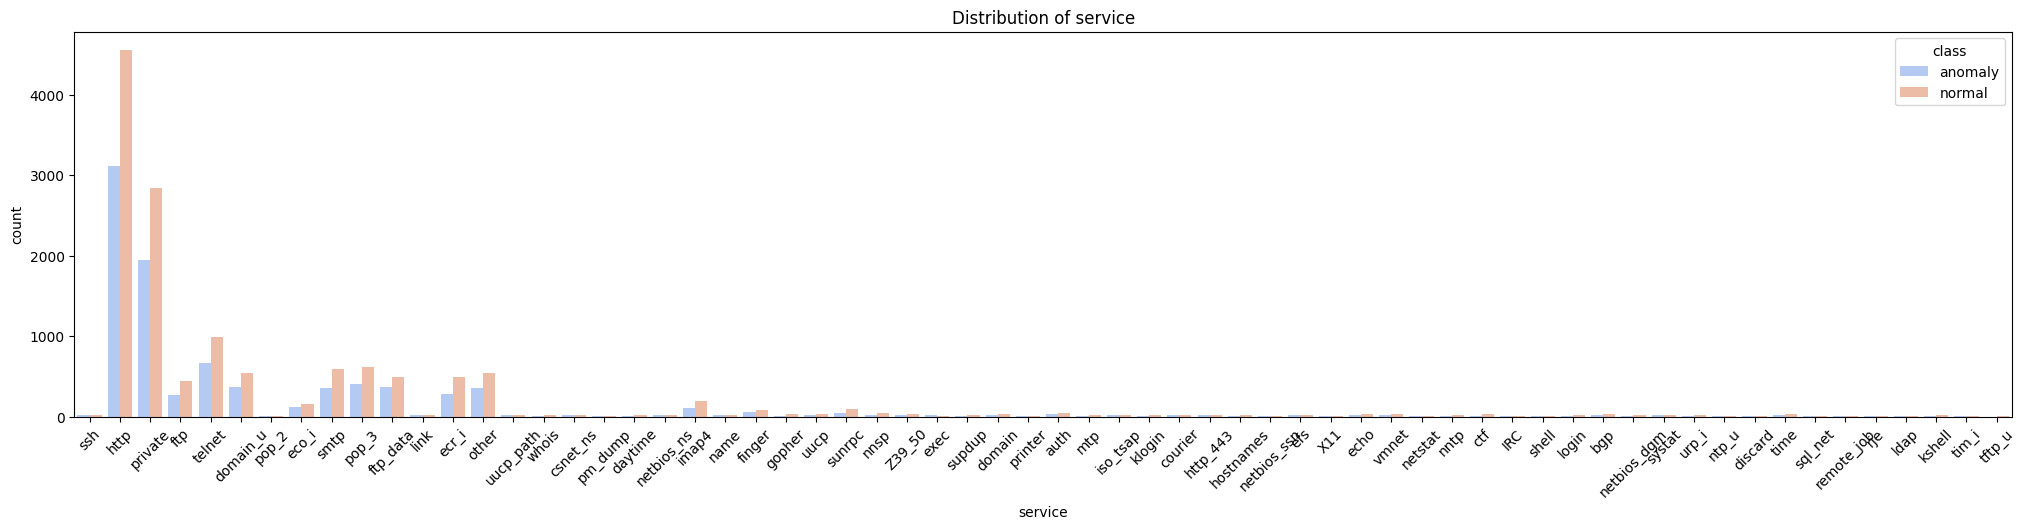

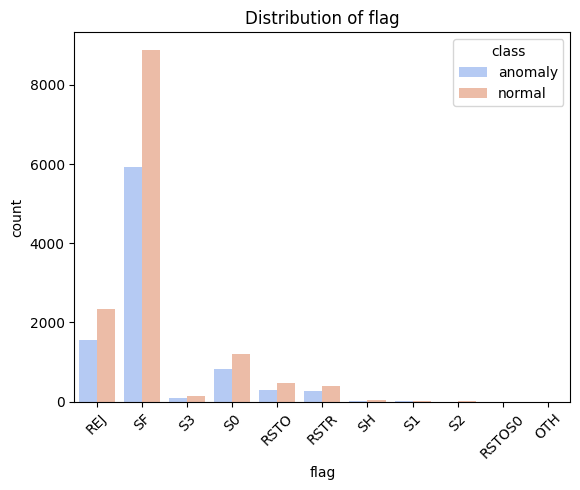

In [ ]:
for category in ['protocol_type', 'service', 'flag']:
    if category == 'service':
        plt.figure(figsize=(25, 5))
    sns.countplot(x=category, data=train, hue='class', palette=("coolwarm"))
    plt.title(f'Distribution of {category}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# duplicates
print(f"Number of duplicate rows in train set: {train.duplicated().sum()}")

Number of duplicate rows in train set: 3361


In [ ]:
# Remove duplicate rows
train.drop_duplicates(inplace=True)

# Verify the number of duplicates removed
print(f"Number of duplicate rows after removal: {train.duplicated().sum()}")


Number of duplicate rows after removal: 0


In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

label_encoding(train)

train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,dataset_type
0,231.798039,1,51,1,-33228.455426,5522.306670,-0.007936,0.098628,0.008210,-1.132613,...,-0.234483,0.072779,0.136304,-0.029332,0.068508,0.102485,1.10863,0.751530,0,0
1,0.000000,1,22,9,303.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.00000,0.000000,1,0
2,0.000000,1,45,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.060000,0.050000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1,0
3,-1481.394313,1,45,1,-66166.304630,2461.990552,-0.003786,-0.049134,-0.032344,0.036302,...,0.104515,0.033048,0.184246,0.115888,0.191587,0.057943,0.70937,1.152130,0,0
4,-54.483317,1,18,9,53902.795844,-7542.705298,0.000159,0.140961,-0.002872,2.203782,...,0.468794,-0.065284,-0.058671,-0.099437,0.063972,0.022689,-0.08107,-0.490316,0,0


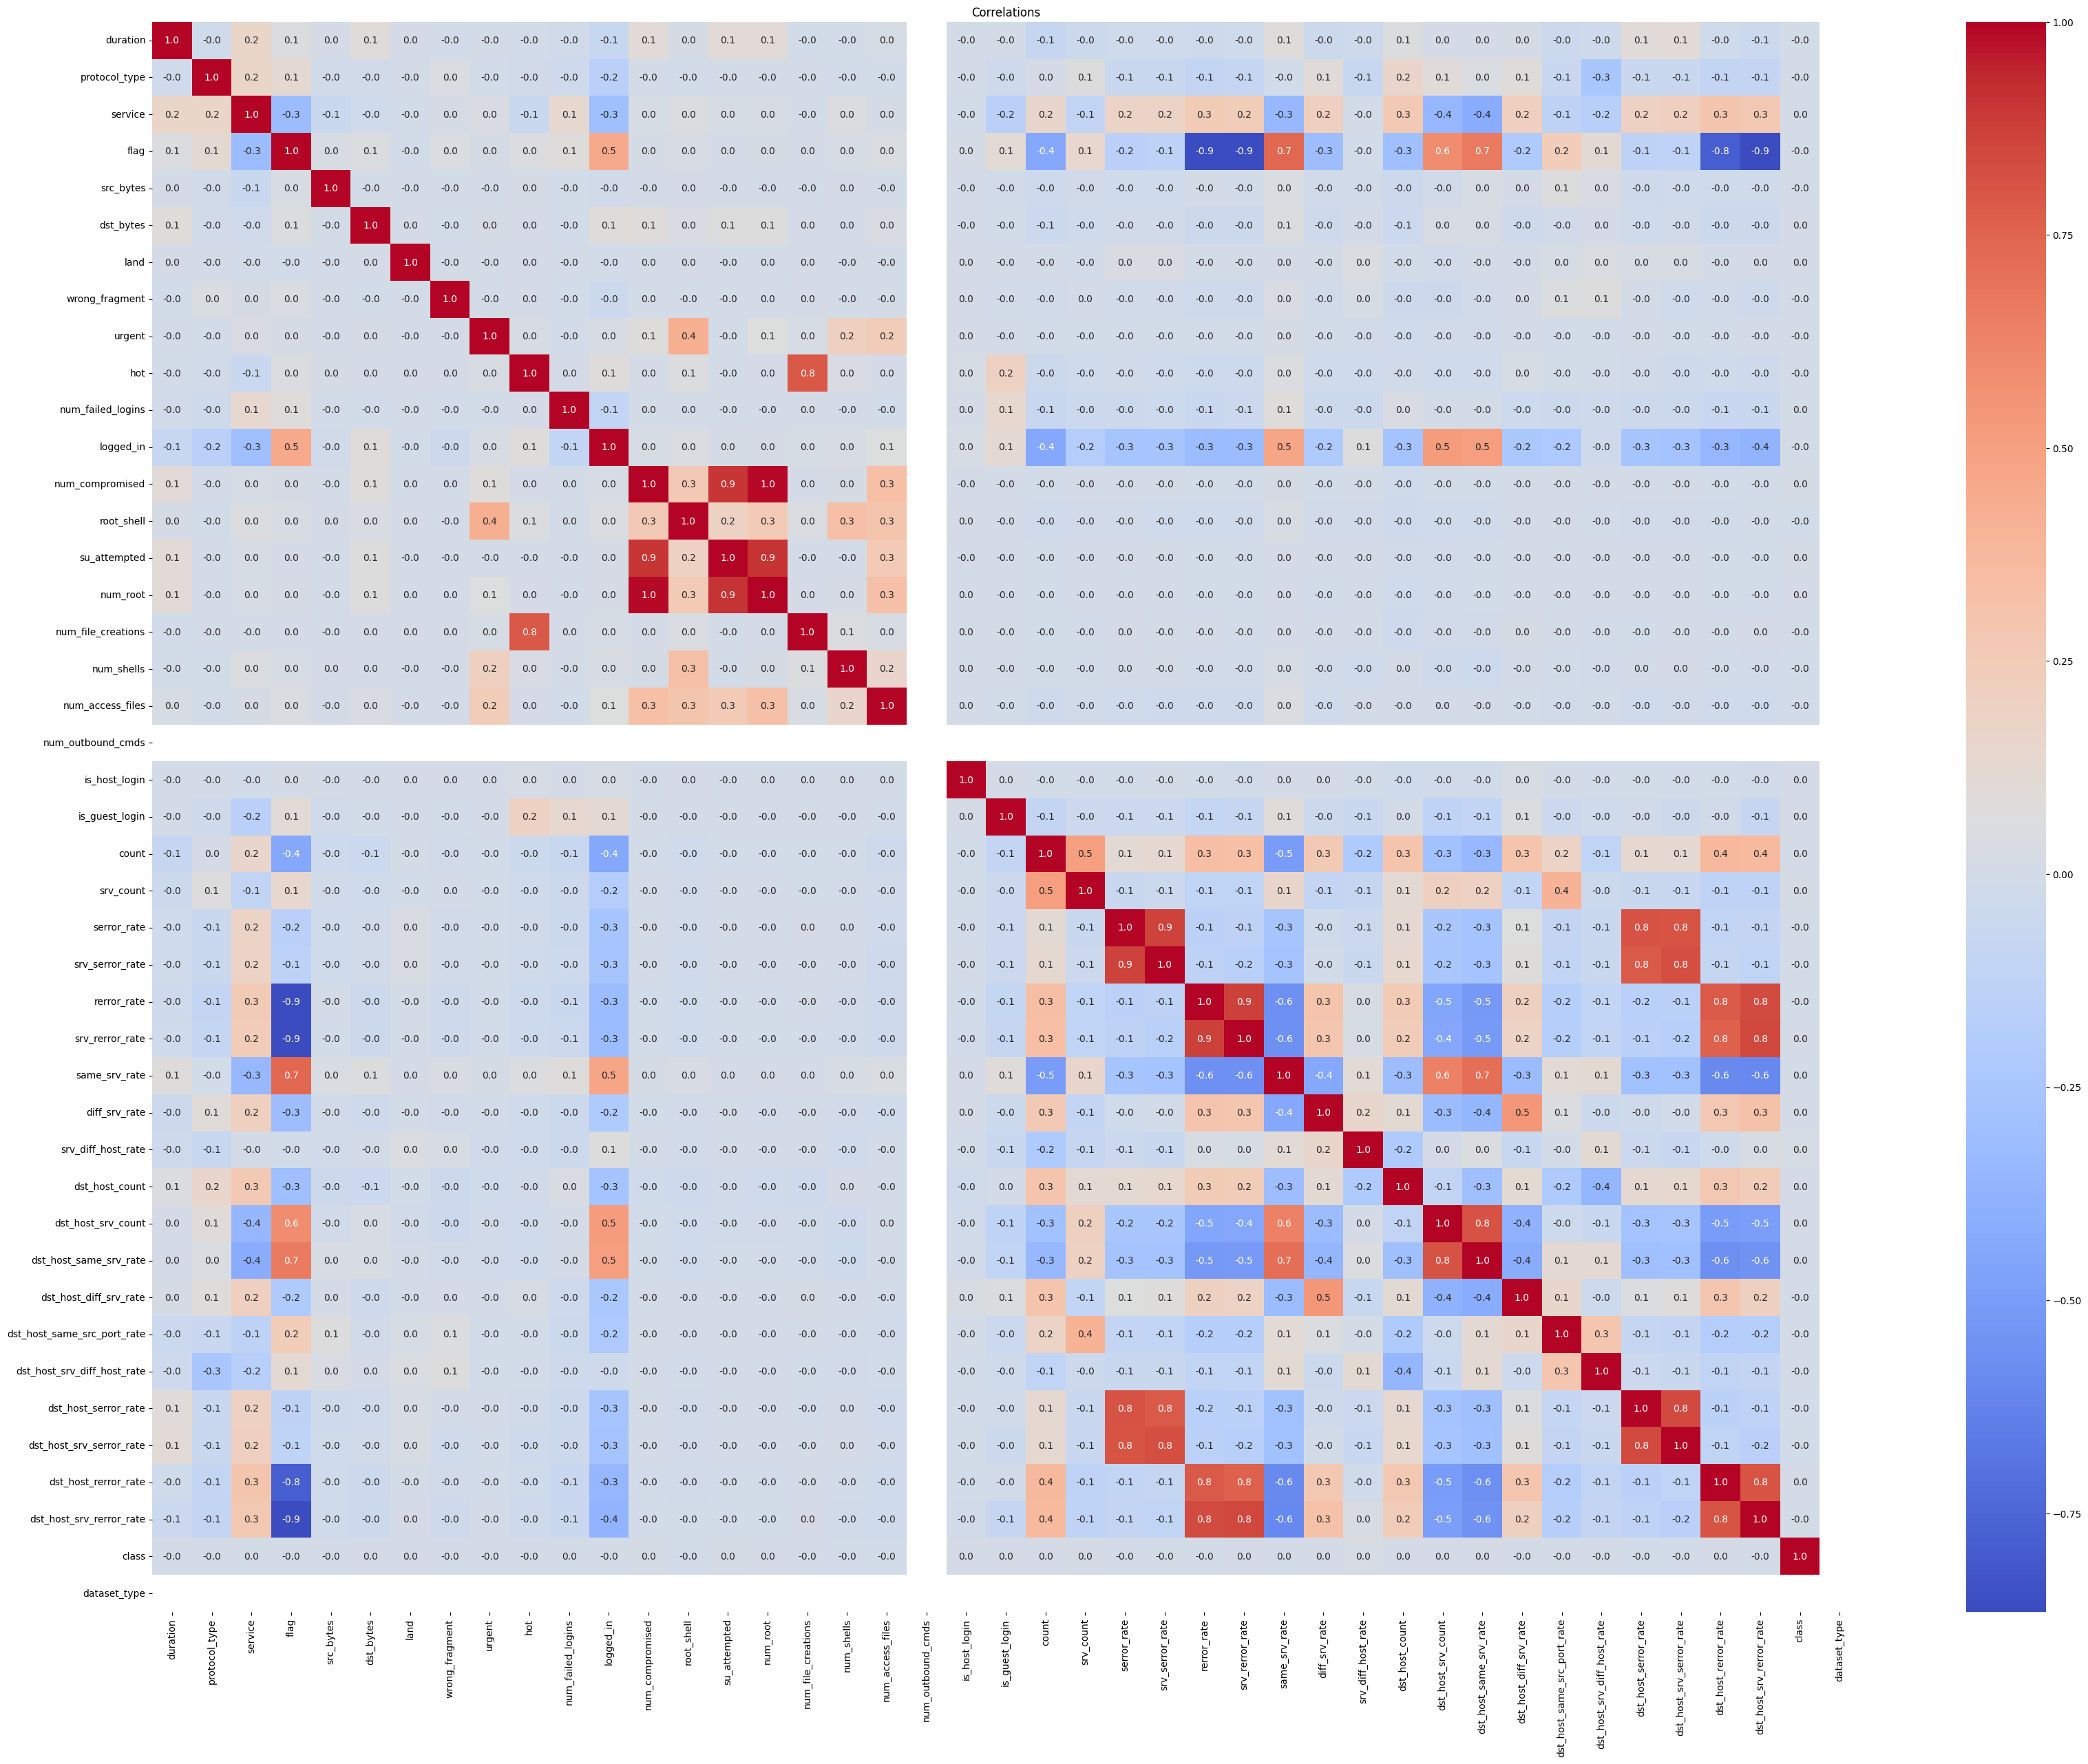

In [ ]:
plt.figure(figsize=(40, 30))
sns.heatmap(train.corr(), annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Correlations')
plt.show()

Index(['flag', 'hot', 'num_compromised', 'su_attempted', 'num_root',
       'num_file_creations', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')


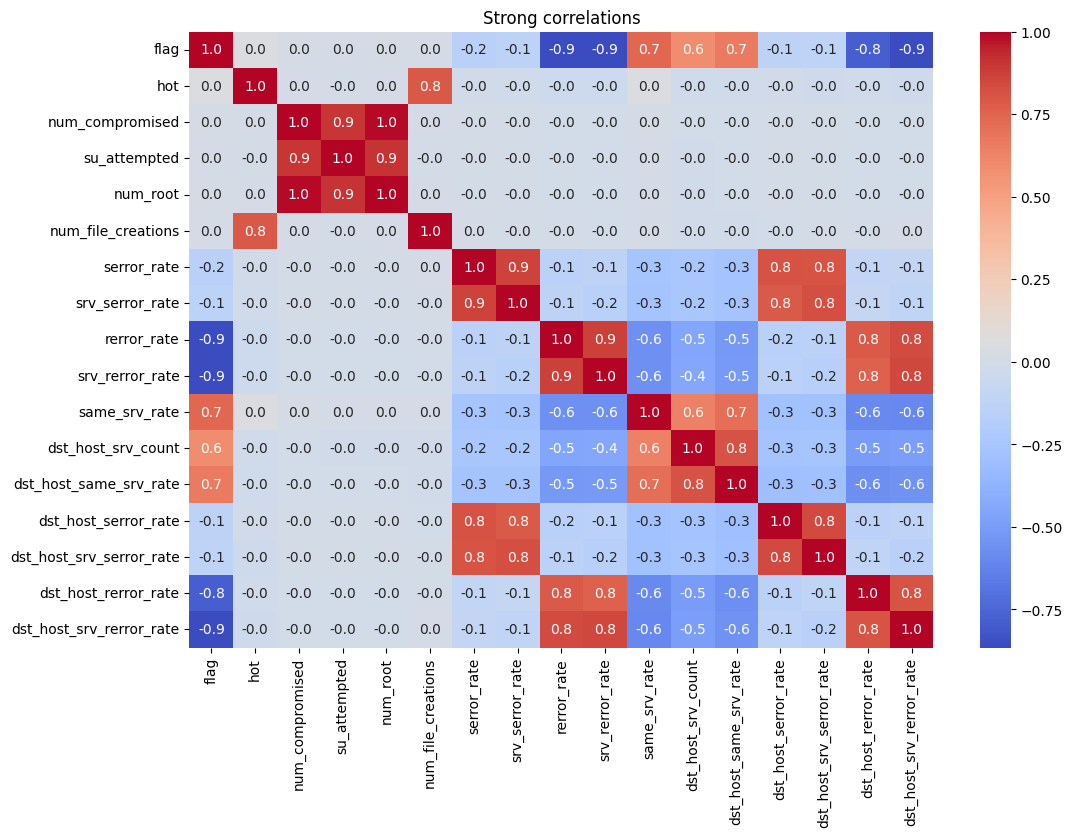

In [ ]:
# only strong correlations
corr_matrix = train.corr()
threshold = 0.7

# Create a mask for values above the threshold or below the negative threshold, excluding self-correlation
mask = np.abs(corr_matrix) >= threshold
np.fill_diagonal(mask.values, False)

# Filter the columns and rows based on the mask
filtered_columns = corr_matrix.columns[mask.any()]
filtered_corr = corr_matrix.loc[filtered_columns, filtered_columns]

print(filtered_columns)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Strong correlations')
plt.show()

In [ ]:
X = train.drop(['num_root', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate', 'class'], axis=1)
y = train['class']

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X = scaler.fit_transform(X)

In [ ]:
def shuffle_data(features, labels):
    indices = np.arange(features.shape[0])
    np.random.shuffle(indices)
    return features[indices], labels[indices]

normal = X[y == 1]
anomalies = X[y == 0]

# select random 5% of anomalies
num_anomalies = int(len(normal) * 0.05)
anomaly_indices = np.random.choice(anomalies.shape[0], num_anomalies, replace=False)
selected_anomalies = anomalies[anomaly_indices]

# combine
X_unbalanced = np.vstack([normal, selected_anomalies])
y_unbalanced = np.concatenate([np.full((len(normal)), 1), np.full((len(selected_anomalies)), 0)])

# shuffle
X_unbalanced, y_unbalanced = shuffle_data(X_unbalanced, y_unbalanced)

In [ ]:
# scores for cross-validation

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1_score': make_scorer(f1_score, average='binary')
}

def display_results(results):
    metrics = {
        "Metric": ["Fit Time", "Score Time", "Accuracy", "Precision", "Recall", "F1 Score"],
        "Value": [results[score_name].mean() for score_name in results]
    }
    df_metrics = pd.DataFrame(metrics)
    df_metrics.set_index("Metric", inplace=True)
    return df_metrics.T

In [ ]:
from sklearn.linear_model import LogisticRegression

# 'newton-cholesky' is the fastest
LR = LogisticRegression(max_iter=7000, solver='newton-cholesky')
results = cross_validate(LR, X_unbalanced, y_unbalanced, cv=5, scoring=scoring, return_train_score = False)
display_results(results)

Metric,Fit Time,Score Time,Accuracy,Precision,Recall,F1 Score
Value,0.04354,0.014957,0.951846,0.952381,0.99941,0.975329


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
results = cross_validate(KNN, X_unbalanced, y_unbalanced, cv=5, scoring=scoring, return_train_score = False)
display_results(results)

Metric,Fit Time,Score Time,Accuracy,Precision,Recall,F1 Score
Value,0.003143,0.242909,0.996346,0.996375,0.999803,0.998085


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler

X_unbalanced_minmax = MinMaxScaler().fit_transform(X_unbalanced)

SVC = LinearSVC()
results = cross_validate(SVC, X_unbalanced_minmax, y_unbalanced, cv=5, scoring=scoring, return_train_score = False)
display_results(results)

Metric,Fit Time,Score Time,Accuracy,Precision,Recall,F1 Score
Value,0.178209,0.030583,0.952408,0.952408,1.0,0.975624


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [ ]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['class'])
y = train['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (use the same scaler)
X_test_scaled = scaler.transform(X_test)

# Now train the logistic regression m
LogisticRegression.fit(X_train_scaled, y_train)


AttributeError: 'numpy.ndarray' object has no attribute '_validate_params'

In [ ]:
# Predict on the test data
y_pred = log_reg.predict(X_test)

# Predict probabilities for ROC-AUC score
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]


NameError: name 'log_reg' is not defined

In [ ]:
# Classification Report (Precision, Recall, F1-Score)
print(classification_report(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# AUC-ROC score
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_prob):.2f}")


              precision    recall  f1-score   support

           0       0.20      0.00      0.00      1601
           1       0.54      1.00      0.70      1891

    accuracy                           0.54      3492
   macro avg       0.37      0.50      0.35      3492
weighted avg       0.38      0.54      0.38      3492

[[   1 1600]
 [   4 1887]]
AUC-ROC: 0.50


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_rf):.2f}")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1840
           1       1.00      1.00      1.00      1997

    accuracy                           1.00      3837
   macro avg       1.00      1.00      1.00      3837
weighted avg       1.00      1.00      1.00      3837

[[1840    0]
 [   0 1997]]
AUC-ROC: 1.00


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# AUC-ROC score
y_pred_prob = model.predict_proba(X_test)[:, 1]
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_prob):.2f}")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1840
           1       1.00      1.00      1.00      1997

    accuracy                           1.00      3837
   macro avg       1.00      1.00      1.00      3837
weighted avg       1.00      1.00      1.00      3837

[[1840    0]
 [   0 1997]]
AUC-ROC: 1.00


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean():.2f}")


Cross-Validation Accuracy: 1.00


In [ ]:
import joblib
loaded_model = joblib.load('/content/random_forest_model.pkl')


In [ ]:
y_pred = model.predict(X_test)  # Predictions


In [ ]:
from sklearn.metrics import accuracy_score

# Example: Classification
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


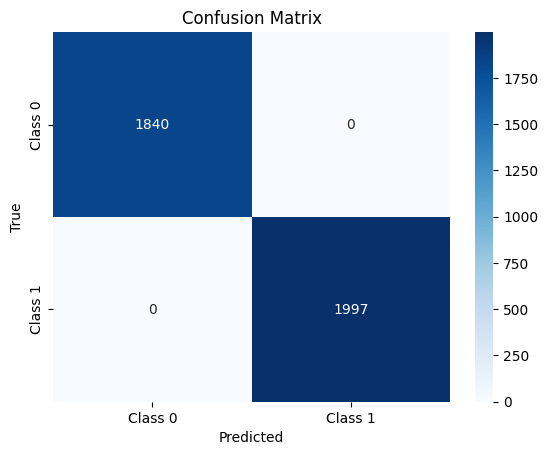

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_prob_rf):.2f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1840
           1       1.00      1.00      1.00      1997

    accuracy                           1.00      3837
   macro avg       1.00      1.00      1.00      3837
weighted avg       1.00      1.00      1.00      3837

Confusion Matrix:
[[1840    0]
 [   0 1997]]
AUC-ROC: 1.00


In [ ]:
# Load the saved model and scaler
rf_model = joblib.load('/content/random_forest_model.pkl')
scaler = joblib.load('/content/random_forest_model.pkl')

# Initialize and fit the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)


In [ ]:
predictions = model.predict(X_test_scaled)


In [ ]:
predictions = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
probabilities = model.predict_proba(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight={0: 1, 1: 10})  # Increase weight for anomalies

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Prepare a sample to test for anomaly detection
test_sample = X_test.iloc[0]
true_label = y_test[0]

test_sample, true_label

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1840
           1       1.00      1.00      1.00      1997

    accuracy                           1.00      3837
   macro avg       1.00      1.00      1.00      3837
weighted avg       1.00      1.00      1.00      3837



(duration                         386.395667
 protocol_type                      1.000000
 service                           45.000000
 flag                              10.000000
 src_bytes                      11041.064504
 dst_bytes                      -2282.571300
 land                              -0.003791
 wrong_fragment                    -0.073904
 urgent                            -0.006051
 hot                               -0.532371
 num_failed_logins                 -0.033873
 logged_in                         -0.237602
 num_compromised                    1.264828
 root_shell                        -0.024549
 su_attempted                       0.000000
 num_root                          -1.429903
 num_file_creations                -0.894911
 num_shells                        -0.001252
 num_access_files                   0.026941
 num_outbound_cmds                  0.000000
 is_host_login                     -0.002591
 is_guest_login                    -0.094295
 count    

In [ ]:
# Define the mapping explicitly
label_mapping = {0: "normal", 1: "anomaly"}

In [ ]:
import numpy as np
import pandas as pd

# Sample data from your dataset
sample_data = np.array([
    386.395667, 1.0, 45.0, 10.0, 11041.064504, -2282.571300, -0.003791, -0.073904, -0.006051,
    -0.532371, -0.033873, -0.237602, 1.264828, -0.024549, 0.0, -1.429903, -0.894911, -0.001252,
    0.026941, 0.0, -0.002591, -0.094295, -26.459982, 50.877181, 1.030442, 1.170818, 0.113902,
    -0.153975, 0.950584, 0.104254, -0.018164, 171.892238, -102.428229, 0.003905, 0.969165,
    0.863652, 0.007701, 0.755341, 1.164614, 0.246667, -0.131322, 0.0
])

# **Replace 'features' with the actual DataFrame containing your training data**
# Assuming your training data is in a DataFrame named 'X_train'
feature_names = X_train.columns  # Ensure features.columns matches the training set

# Convert the sample to a DataFrame with correct feature names
sample_df = pd.DataFrame([sample_data], columns=feature_names)

# Define the label mapping explicitly
label_mapping = {0: "normal", 1: "anomaly"}

# Predict the label using the trained Random Forest model
predicted_label = rf_model.predict(sample_df)

# Convert the numerical prediction to a descriptive label
predicted_class = label_mapping[predicted_label[0]]

# Display the results
print(f"Predicted Class for the Sample: {predicted_class}")

# Include true label if available for comparison (adjust as necessary)
true_label = 0  # Replace with actual true label if available
true_class = label_mapping[true_label]

print(f"True Class for the Sample: {true_class}")

Predicted Class for the Sample: normal
True Class for the Sample: normal


In [ ]:
# Find an anomalous sample in the test set
anomaly_indices = np.where(y_test == 1)[0]  # Find all indices of anomalies
if anomaly_indices.size > 0:  # Check if any anomalies were found
    anomaly_index = anomaly_indices[0]  # Select the first anomaly index
    anomaly_sample = X_test.iloc[anomaly_index]  # Select the anomaly sample
    true_label = y_test.iloc[anomaly_index]  # Get the true label using .iloc
    print(f"Anomaly index: {anomaly_index}") # Corrected indentation
    print(f"True label of anomaly sample: {true_label}") # Corrected indentation
else:
    print("No anomalies found in the test set.")
    # Handle the case where no anomalies are found (e.g., skip or use a default sample)

Anomaly index: 1
True label of anomaly sample: 1


In [ ]:
# Fetch the row at index 1 from the test set
anomaly_row = X_test.iloc[1]  # Replace 1 with the desired index

# Display the row
print("Anomalous Sample:")
print(anomaly_row)

# Fetch the corresponding true label
true_label = y_test.iloc[1]  # Replace 1 with the same index
print(f"True Label: {true_label}")


Anomalous Sample:
duration                          0.00
protocol_type                     1.00
service                          22.00
flag                              9.00
src_bytes                       239.00
dst_bytes                      2549.00
land                              0.00
wrong_fragment                    0.00
urgent                            0.00
hot                               0.00
num_failed_logins                 0.00
logged_in                         1.00
num_compromised                   0.00
root_shell                        0.00
su_attempted                      0.00
num_root                          0.00
num_file_creations                0.00
num_shells                        0.00
num_access_files                  0.00
num_outbound_cmds                 0.00
is_host_login                     0.00
is_guest_login                    0.00
count                             6.00
srv_count                        11.00
serror_rate                       0.00
srv_ser

In [ ]:
import pandas as pd
import numpy as np

# Provided anomalous sample
anomaly_sample = {
    "duration": 0.00,
    "protocol_type": 1.00,
    "service": 22.00,
    "flag": 9.00,
    "src_bytes": 239.00,
    "dst_bytes": 2549.00,
    "land": 0.00,
    "wrong_fragment": 0.00,
    "urgent": 0.00,
    "hot": 0.00,
    "num_failed_logins": 0.00,
    "logged_in": 1.00,
    "num_compromised": 0.00,
    "root_shell": 0.00,
    "su_attempted": 0.00,
    "num_root": 0.00,
    "num_file_creations": 0.00,
    "num_shells": 0.00,
    "num_access_files": 0.00,
    "num_outbound_cmds": 0.00,
    "is_host_login": 0.00,
    "is_guest_login": 0.00,
    "count": 6.00,
    "srv_count": 11.00,
    "serror_rate": 0.00,
    "srv_serror_rate": 0.00,
    "rerror_rate": 0.00,
    "srv_rerror_rate": 0.00,
    "same_srv_rate": 1.00,
    "diff_srv_rate": 0.00,
    "srv_diff_host_rate": 0.27,
    "dst_host_count": 255.00,
    "dst_host_srv_count": 255.00,
    "dst_host_same_srv_rate": 1.00,
    "dst_host_diff_srv_rate": 0.00,
    "dst_host_same_src_port_rate": 0.00,
    "dst_host_srv_diff_host_rate": 0.00,
    "dst_host_serror_rate": 0.00,
    "dst_host_srv_serror_rate": 0.00,
    "dst_host_rerror_rate": 0.00,
    "dst_host_srv_rerror_rate": 0.00,
    "dataset_type": 0.00,
}

# Convert the sample to a DataFrame with correct feature names
sample_df = pd.DataFrame([anomaly_sample])

# True label for the anomaly sample
true_label = 1  # "anomaly"

# Define the label mapping
label_mapping = {0: "normal", 1: "anomaly"}

# Predict the label using the trained Random Forest model
predicted_label = rf_model.predict(sample_df)

# Map numerical prediction to descriptive label
predicted_class = label_mapping[predicted_label[0]]
true_class = label_mapping[true_label]

# Display the results
print("Testing Provided Anomalous Sample:")
print(f"Predicted Class: {predicted_class}")
print(f"True Class: {true_class}")


Testing Provided Anomalous Sample:
Predicted Class: anomaly
True Class: anomaly
